# 📓 Lagrangian Mechanics Tutorial
## 🔹 Example 2: Mass on a Spring with a Damper and Gravity

In [1]:
from sympy import symbols, Function, diff, simplify, solve, Eq, dsolve
from sympy.physics.mechanics import dynamicsymbols
from sympy import init_printing
from IPython.display import display

init_printing()  # Enables pretty printing in Jupyter


## 🔹 1. Define Coordinates and Time
We consider a point mass $m$ hanging from a spring (constant $k$) with a damper (coefficient $c$), under gravity. Let $x(t)$ be the vertical displacement.

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Mass_spring_damper.svg/1024px-Mass_spring_damper.svg.png" width="250">

In [2]:
t = symbols('t')
x = dynamicsymbols('x')  # downward displacement from unstretched spring position
m, k, c, g = symbols('m k c g')

## 🔹 2. Kinetic Energy $T$

$$
T = \frac{1}{2} m \dot{x}^2
$$

In [3]:
x_dot = diff(x, t)
T = (1/2) * m * x_dot**2
display(T)

## 🔹 3. Potential Energy $V$
Includes both spring and gravity:

$$
V = \frac{1}{2} k x^2 + m g x
$$

In [4]:
V = (1/2) * k * x**2 + m * g * x
display(V)

## 🔹 4. Lagrangian $L = T - V$

$$
L = \frac{1}{2} m \dot{x}^2 - \left( \frac{1}{2} k x^2 + m g x \right)
$$

In [5]:
L = T - V
display(L)

## 🔹 5. Apply Euler-Lagrange Equation

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}} \right) - \frac{\partial L}{\partial x} = Q
$$

Where $Q$ is the **non-conservative damping force**:

$$
Q = -c \dot{x}
$$

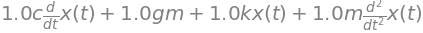

In [6]:
# Derivatives
dL_dx = diff(L, x)
dL_dx_dot = diff(L, x_dot)
d_dt_dL_dx_dot = diff(dL_dx_dot, t)

# Damping force
Q = -c * x_dot

# Lagrange equation with damping
lagrange_eq = simplify(d_dt_dL_dx_dot - dL_dx - Q)
display(lagrange_eq)

## ✅ Final Result
The resulting equation of motion:

$$
m \ddot{x} + c \dot{x} + k x + m g = 0
$$

which we want to express it again as: $$ \ddot{x} = f(\dot{x}, x, ..., t) $$

In [7]:
x_ddot = diff(x, t, 2)
eq = Eq(lagrange_eq, 0)
sol_x_ddot = solve(eq, x_ddot)[0]
display(sol_x_ddot)

## 🔹 6. Solve the Differential Equation
We now solve for $x(t)$ symbolically using _sympy.dsolve_

In [8]:
ode = Eq(x_ddot, sol_x_ddot)
sol_x = dsolve(ode, x)
sol_x

Where $C_1$ and $C_2$ are initial conditions similarly as in previous example 

## 🌟 Conclusion
We derived and solved the equation of motion for a vertical spring-damper system under gravity using the Lagrangian method extended with non-conservative forces.